# Problem 1
### (1)

In [31]:
# modules for matrix operations
import numpy as np
import scipy.linalg
from __future__ import division

# modules for visualization
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.path import Path
import matplotlib.patches as patches

verts = [
(0., 0.), # left, bottom
(0., 1.), # left, top
(1., 1.), # right, top
(1., 0.), # right, bottom
(0., 0.), # ignored
        ]

# codes that specify how to create a polygon path with the above vertices.\n",
codes = [Path.MOVETO,
         Path.LINETO,
         Path.LINETO,
         Path.LINETO,
         Path.CLOSEPOLY,
         ]

In [32]:
I = np.array([[1.0, 0.0], [0.0, 1.0]])

# constants
a=1
b=1
c=0.1

t=1
phi = np.array([[1 + c*t/a, 0], [0, 1 + c*t/b]])
Xt1 = np.dot(phi,I)

t=2
phi = np.array([[1 + c*t/a, 0], [0, 1 + c*t/b]])
Xt2 = np.dot(phi,I)

t=3
phi = np.array([[1 + c*t/a, 0], [0, 1 + c*t/b]])
Xt3 = np.dot(phi,I)

In [33]:
# Define a set of points in the reference configuration.
ref_points = np.array([[0.0, 0.0],[1.0, 0.0],[1.0, 1.0],[0.0,1.0]])
num_points = ref_points.shape[0]
#print ref_points\n",
#print ref_points.shape\n",
 
# create a path for the reference configuration
verts = []
for i in range(4):
    verts.append( (ref_points[i][0],ref_points[i][1]) )
verts.append((ref_points[0][0],ref_points[0][1]))
ref_polygon = Path(verts, codes)

# Create an array for mapped points
cur_points = np.zeros((4,2))

# create a path for t1, t2, and t3 
for i in range(num_points):
    cur_points[i] = np.dot(Xt1, ref_points[i])
    verts[i] = (cur_points[i][0], cur_points[i][1])
verts[num_points] = (cur_points[0][0], cur_points[0][1])
polygon_by_t1 = Path(verts, codes)

for i in range(num_points):
    cur_points[i] = np.dot(Xt2, ref_points[i])
    verts[i] = (cur_points[i][0], cur_points[i][1])
verts[num_points] = (cur_points[0][0], cur_points[0][1])
polygon_by_t2 = Path(verts, codes)

for i in range(num_points):
    cur_points[i] = np.dot(Xt3, ref_points[i])
    verts[i] = (cur_points[i][0], cur_points[i][1])
verts[num_points] = (cur_points[0][0], cur_points[0][1])
polygon_by_t3 = Path(verts, codes)

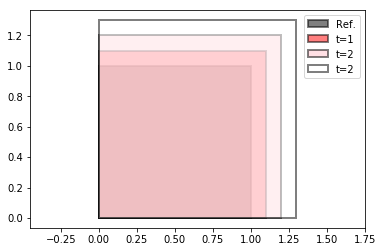

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111)

patch1 = patches.PathPatch(ref_polygon, facecolor='black', alpha=0.5, lw=2, label='Ref.')
patch2 = patches.PathPatch(polygon_by_t1, facecolor='red', alpha=0.5, lw=2, label='t=1')
patch3 = patches.PathPatch(polygon_by_t2, facecolor='pink', alpha=0.5, lw=2, label='t=2')
patch4 = patches.PathPatch(polygon_by_t3, facecolor='white', alpha=0.5, lw=2, label='t=2')
ax.add_patch(patch1)
ax.add_patch(patch2)
ax.add_patch(patch3)
ax.add_patch(patch4)

ax.set_xlim(-2,10)
ax.set_ylim(-2,10)
ax.axis('equal')
plt.legend()

plt.show(fig)

### (2)

$x_1(X,t) = X_1 + \frac {c t X_1}{a}$

$x_2(X,t) = X_2 + \frac {c t X_2}{b}$

$ v_i = \frac{\partial x_i}{\partial t} $

$ v_1 = \frac{\partial \big( X_1 + \frac {c t X_1}{a} \big) }{\partial t} = \frac{c X_1}{a} = \frac{c}{a+ct} x_1$

$ v_2 = \frac{\partial \big( X_2 + \frac {c t X_2}{b} \big) }{\partial t} = \frac{c X_2}{b} = \frac{c}{b+ct} x_2 $

### (3)

$
\begin{equation}
\begin{split}
\mathbf{\varepsilon} & = \frac{1}{2} \Big[ \frac{\partial \mathbf{U}}{\partial \mathbf{X}} + \Big( \frac{\partial \mathbf{U}}{\partial \mathbf{X}} \Big) ^T \Big]\\ \\
       & = \frac{1}{2} \Big[ \Big( \mathbf{F} - \mathbf{I} \Big) + \Big( \mathbf{F} - \mathbf{I} \Big) ^T \Big]\\ \\
       & = \frac{1}{2} \Bigg[ 
       \begin{pmatrix}
  0 & X_1 + \frac {c t X_1}{a} \\
  X_2 + \frac {c t X_2}{b} & 0
 \end{pmatrix} - 
 \begin{pmatrix}
  0 & X_2 + \frac {c t X_2}{b} \\
  X_1 + \frac {c t X_1}{a} & 0
 \end{pmatrix}
 \Bigg] \\ \\
       & = \frac{1}{2} 
       \begin{pmatrix}
  0 & \frac{a + c t}{a} X_1 - \frac{b + c t}{b} X_2 \\
  \frac{b + c t}{b} X_2 - \frac{a + c t}{a} X_1 & 0
 \end{pmatrix} 
\end{split}
\end{equation}
 \\ \\
$



$
\begin{equation}
\begin{split}
\mathbf{ \dot{\varepsilon}} & = \frac{\partial \mathbf{\varepsilon}}{\partial t} \\ \\
    & = \frac{1}{2}  
       \begin{pmatrix}
  0 & \frac {c t X_1}{a} - \frac {c t X_2}{b} \\
  \frac {c t X_2}{b} -  \frac {c t X_1}{a}& 0
 \end{pmatrix}
\end{split}
\end{equation}
$

### (4)

$
\begin{equation}
\begin{split}
\rho &= \frac{\rho_0}{|J|} \\
     &= \frac{\rho_0}{\big( 1+\frac{ct}{a} \big)\big( 1+\frac{ct}{b} \big)}
\end{split}
\end{equation}
$

### (5)

$
\begin{equation}
\begin{split}
\frac{\partial \rho (t)}{\partial t} &= - \frac{ac \rho_0}{(t+ac)^2 ( 1+\frac{ct}{b})}- \frac{bc \rho_0}{(t+ab)^2 ( 1+\frac{ct}{a})} \\ \\
&= -\frac{\rho_0 \big( \frac{c}{a+ct} + \frac{c}{b+ct}\big)}{\big( 1+ \frac{ct}{a}\big)\big( 1+ \frac{ct}{b}\big)}
\end{split}
\end{equation}
$

$
\begin{equation}
\begin{split}
\nabla \cdot (\rho \mathbf{v}) &= \rho \bigg( \frac{\partial v_1}{\partial x_1} + \frac{\partial v_2}{\partial x_2}\bigg) \\ \\
&= \rho \big( \frac{c}{a+ct} + \frac{c}{b+ct}\big) \\ \\
&= \frac{\rho_0 \big( \frac{c}{a+ct} + \frac{c}{b+ct}\big)}{\big( 1+ \frac{ct}{a}\big)\big( 1+ \frac{ct}{b}\big)}
\end{split}
\end{equation}
$

Therefore, $\frac{\partial \rho (t)}{\partial t} + \nabla \cdot (\rho \mathbf{v}) = 0$



### (6)

$
\begin{equation}
\begin{split}
\int_{v(t)} \nabla \cdot (\rho \mathbf{v}) dV &= \int_{v(t)} \frac{\rho_0 \big( \frac{c}{a+ct} + \frac{c}{b+ct}\big)}{\big( 1+ \frac{ct}{a}\big)\big( 1+ \frac{ct}{b}\big)} dV 
= \frac{\rho_0 \big( \frac{c}{a+ct} + \frac{c}{b+ct}\big)}{\big( 1+ \frac{ct}{a}\big)\big( 1+ \frac{ct}{b}\big)} \\ \\
\int_{\partial v(t)} \rho \mathbf{v} \cdot \mathbf{n} dS &= \int_{e_1} \rho \mathbf{v} \cdot \mathbf{n_1} dl + \int_{e_2} \rho \mathbf{v} \cdot \mathbf{n_2} dl + \int_{e_3} \rho \mathbf{v} \cdot \mathbf{n_3} dl + \int_{e_4} \rho \mathbf{v} \cdot \mathbf{n_4} dl
\end{split}
\end{equation}
$

At each edges,

$
\begin{equation}
\mathbf{n_1} = (0,-1) \\
\mathbf{n_2} = (1,0) \\
\mathbf{n_3} = (0,1) \\
\mathbf{n_4} = (-1,0) \\
\end{equation}
$

Along the edge 1, 

$
\begin{equation}
\begin{split}
\int_{e_1} \rho \mathbf{v} \cdot \mathbf{n_1} dl &= \rho \int_{e_1} [\frac{c}{a+ct} x_1, \frac{c}{b+ct} x_2] \cdot [0,-1] \; dl \\
&= \rho \int_0^1 - \frac{c}{b+ct} x_2 \; dx_1
\end{split}
\end{equation}
$

Along the edge 2, 

$
\begin{equation}
\begin{split}
\int_{e_2} \rho \mathbf{v} \cdot \mathbf{n_2} dl &= \rho \int_{e_2} [\frac{c}{a+ct} x_1, \frac{c}{b+ct} x_2] \cdot [1,0] \; dl \\
&= \rho \int_0^1 \frac{c}{a+ct} x_1 \; dx_2
\end{split}
\end{equation}
$

Along the edge 3, 

$
\begin{equation}
\begin{split}
\int_{e_3} \rho \mathbf{v} \cdot \mathbf{n_3} dl &= \rho \int_{e_3} [\frac{c}{a+ct} x_1, \frac{c}{b+ct} x_2] \cdot [0,1] \; dl \\
&= \rho \int_0^1  \frac{c}{b+ct} x_2 \; dx_1
\end{split}
\end{equation}
$

Along the edge 2, 

$
\begin{equation}
\begin{split}
\int_{e_4} \rho \mathbf{v} \cdot \mathbf{n_4} dl &= \rho \int_{e_4} [\frac{c}{a+ct} x_1, \frac{c}{b+ct} x_2] \cdot [-1,0] \; dl \\
&= \rho \int_0^1 - \frac{c}{a+ct} x_1 \; dx_2
\end{split}
\end{equation}
$

# Problem 2
### (1)

$
\begin{equation}
\begin{split}
\sigma_{12}^{'} &= (\sigma_{22}- \sigma_{11}) \sin\theta \cos\theta + \sigma_{12} \cos 2\theta &= 0 \\
                &= (\sigma_{22}- \sigma_{11}) \frac{\sin 2\theta}{2} + \sigma_{12} \cos 2\theta \\
                &= \frac{\sigma_{22}- \sigma_{11}}{2} \tan 2\theta + \sigma_{12} \\ \\
\tan 2\theta &= -\frac{2 \sigma_{12}}{\sigma_{22}- \sigma_{11}} \\
\theta &= - \frac{1}{2}\tan^{-1} \bigg( \frac{2 \sigma_{12}}{\sigma_{22}- \sigma_{11}} \bigg)
\end{split}
\end{equation}
$

### (2)
$
\begin{equation}
\begin{split}
\sigma_{11}^{'} &= \sigma_{11} \cos^{2} \theta + \sigma_{22} \sin^{2} \theta + \sigma_{12} \sin 2\theta \\
\sigma_{22}^{'} &= \sigma_{11} \sin^{2} \theta + \sigma_{22} \cos^{2} \theta - \sigma_{12} \sin 2\theta \\
\sigma_{22}^{'} - \sigma_{11}^{'}&= \sigma_{11}^{'} \big( \cos^2 \theta - \sin^2 \theta \big) + \sigma_{22}^{'} 
                                    \big( \sin^2 \theta - \cos^2 \theta \big) + 2 \sigma_{12} \sin 2 \theta = 0 \\
\end{split}
\end{equation}
$

$
\begin{equation}
\begin{split}
(\sigma_{11} - \sigma_{22}) \cos 2 \theta + 2 \sigma_{12} \sin 2 \theta = 0 \\
2R \cos 2 \beta \cos 2 \theta + 2R \sin 2 \beta \sin 2 \theta = 0 \\
(\because \frac{1}{2} (\sigma_{22} - \sigma_{11}) = R \cos 2 \beta, \ \sigma_{12} = R \sin 2 \beta ) \\
1+ \tan 2 \beta \cdot \tan 2 \theta = 0 \\
\end{split}
\end{equation}
$

$
\begin{equation}
\theta = \frac{1}{2} \tan^{-1} \big(- \frac{1}{\tan 2 \beta} \big)
\end{equation}
$

### (3)
In order to find the angles at which each of the rotated components is maximized in magnitude, I should find the angles satisfying the below conditions.

$
\begin{equation}
\begin{split}
\frac{\partial \sigma_{11}^{'}}{\partial \theta} &= 0, \frac{\partial^2 \sigma_{11}^{'}}{\partial \theta^2} &> 0 \\
\frac{\partial \sigma_{22}^{'}}{\partial \theta} &= 0, \frac{\partial^2 \sigma_{22}^{'}}{\partial \theta^2} &> 0 \\
\frac{\partial \sigma_{12}^{'}}{\partial \theta} &= 0, \frac{\partial^2 \sigma_{12}^{'}}{\partial \theta^2} &> 0 \\
\end{split}
\end{equation}
$

$
\begin{equation}
\begin{split}
\theta_{11} &= \frac{1}{2} \tan^{-1} \big( \frac{2 \sigma_{12}}{\sigma_{11}-\sigma_{22}} \big) \\
\theta_{22} &= \frac{1}{2} \tan^{-1} \big( \frac{2 \sigma_{12}}{\sigma_{11}-\sigma_{22}} \big) \\
\theta_{12} &= \frac{1}{2} \tan^{-1} \big( \frac{\sigma_{22}-\sigma_{11}}{2 \sigma_{12}} \big) \\
\end{split}
\end{equation}
$

where, 

$
\\
\begin{equation}
\begin{split}
\theta_{11} &< \frac{1}{2} \tan^{-1} \big( \frac{ \sigma_{11} - \sigma_{22}}{2\sigma_{12}} \big) \\
\theta_{22} &> \frac{1}{2} \tan^{-1} \big( \frac{ \sigma_{11} - \sigma_{22}}{2\sigma_{12}} \big) \\
\theta_{12} &< \frac{1}{2} \tan^{-1} \big( - \frac{4 \sigma_{12}}{2(\sigma_{22}-\sigma_{11})} \big) \\
\end{split}
\end{equation}
$

# Problem 3

### (1) 2-34

In [57]:
A_lat = 38.3137
A_lon = -123.0689
A_vel_N = 33
A_vel_E = -24
B_lat = 38.4442
B_lon = -122.1953
B_vel_N = 20
B_vel_E = -13
C_lat = 38.7778
C_lon = -122.5758
C_vel_N = 16
C_vel_E = -14

AB_length_ns = ((B_lat)-(A_lat))*((np.pi*6378)/180)
AC_length_ns = ((C_lat)-(A_lat))*((np.pi*6378)/180)
BC_length_ns = ((C_lat)-(B_lat))*((np.pi*6378)/180)
AB_lat = 0.5*(A_lat + B_lat)
AC_lat = 0.5*(A_lat + C_lat)
BC_lat = 0.5*(B_lat + C_lat)
AB_length_ew = ((B_lon)-(A_lon))*((np.pi*6378)/180) * np.cos(AB_lat*np.pi/180)
AC_length_ew = ((C_lon)-(A_lon))*((np.pi*6378)/180) * np.cos(AC_lat*np.pi/180)
BC_length_ew = ((B_lon)-(C_lon))*((np.pi*6378)/180) * np.cos(BC_lat*np.pi/180)
    
# line lengths AB, AC, and BC
AB_length = np.sqrt(AB_length_ns**2 + AB_length_ew**2)
AC_length = np.sqrt(AC_length_ns**2 + AC_length_ew**2)
BC_length = np.sqrt(BC_length_ns**2 + BC_length_ew**2)
print('(a) line length of AB, AC, and BC = ', AB_length, AC_length, BC_length)
AB_angle = np.arctan((AB_length_ns*np.pi/180) / (AB_length_ew*np.pi/180))
AC_angle = np.arctan((AC_length_ns*np.pi/180) / (AC_length_ew*np.pi/180))
BC_angle = np.arctan((BC_length_ns*np.pi/180) / (BC_length_ew*np.pi/180))
    
# the magnitude and direction of the monument velocities 
A_vel = np.sqrt((A_vel_E)**2 + (A_vel_N)**2)
A_angle = (np.arctan(A_vel_E/A_vel_N))*180/np.pi
B_vel = np.sqrt((B_vel_E)**2 + (B_vel_N)**2)
B_angle = (np.arctan(B_vel_E/B_vel_N))*180/np.pi
C_vel = np.sqrt((C_vel_E)**2 + (C_vel_N)**2)
C_angle = (np.arctan(C_vel_E/C_vel_N))*180/np.pi
print('(b) A velocity & angle = ', A_vel, A_angle)
print('    B velocity & angle = ', B_vel, B_angle)
print('    C velocity & angle = ', C_vel, C_angle)
    
# Change in the line length and the rates of strain
AB_length_chng_N = B_vel_N - A_vel_N
AC_length_chng_N = C_vel_N - A_vel_N
BC_length_chng_N = C_vel_N - B_vel_N
AB_length_chng_E = B_vel_E - A_vel_E
AC_length_chng_E = C_vel_E - A_vel_E
BC_length_chng_E = C_vel_E - B_vel_E
AB_length_chng = (AB_length_chng_N*np.sin(AB_angle)) + (AB_length_chng_E*np.cos(AB_angle))
AC_length_chng = (AC_length_chng_N*np.sin(AC_angle)) + (AC_length_chng_E*np.cos(AC_angle))
BC_length_chng = (BC_length_chng_N*np.sin(BC_angle)) + (BC_length_chng_E*np.cos(BC_angle))
print('(c) change in the line length, delta AB = ', AB_length_chng)
print('    change in the line length, delta AC = ', AC_length_chng)
print('    change in the line length, delta BC = ', BC_length_chng)
strain_rate_xx = -(AB_length_chng*1e-6/AB_length)
strain_rate_xX = -(AC_length_chng*1e-6/AC_length)
strain_rate_XX = -(BC_length_chng*1e-6/BC_length)
print('    strain rate xx = ', strain_rate_xx)
print('    strain rate xX = ', strain_rate_xX)
print('    strain rate XX = ', strain_rate_XX)

# the angle theta1 and theta2 and the rates of strain
Angle_1 = (AC_angle-AB_angle) * 180/np.pi
Angle_2 = ((pi/180 * 180) - AB_angle - BC_angle) * 180/np.pi
print('(d) theta1 = ', Angle_1)
print('    theta2 = ', Angle_2)
print('    strain rate zz = ', 2.2653e-07)
print('    strain rate xz = ', 7.3526e-08)
#strain_rate_zz = ((strain_rate_xx*(1/(np.tan(Angle_1*np.pi/180)) 
#                                   - 1/(np.tan(Angle_2*np.pi/180))) - 
#                  (strain_rate_xX*1/(np.cos(Angle_1*np.pi/180))
#                   *1/(np.sin(Angle_1*np.pi/180)) + 
#                  (strain_rate_XX*1/(np.cos(Angle_2*np.pi/180))*1/(np.sin(Angle_2*np.pi/180))
#                   ) / (np.tan(Angle_2*pi/180) - np.tan(Angle_1*np.pi/180))
#### I gave up to calculate strain rates by using python! :(
####'RuntimeWarning: invalid value encountered in double_scalars', 
####'unexpected EOF while parsing', and other issues & errors are popping up 
#### whenever I try to use cot, sec, and csc functions.
#### I even tried to import mpmath, but it crushed with numpy.
#### I attached matlab code to calculate these two.

(a) line length of AB, AC, and BC =  77.60548426229576 67.17150527333746 49.7439117957331
(b) A velocity & angle =  40.80441152620633 -36.02737338510361
    B velocity & angle =  23.853720883753127 -33.02386755579665
    C velocity & angle =  21.2602916254693 -41.185925165709655
(c) change in the line length, delta AB =  8.37210832292833
    change in the line length, delta AC =  -6.683701206567021
    change in the line length, delta BC =  -3.651475342095485
    strain rate xx =  -1.0788036957068352e-07
    strain rate xX =  9.950203109740341e-08
    strain rate XX =  7.340547235387907e-08
(d) theta1 =  39.48524674275463
    theta2 =  120.920435431875
    strain rate zz =  2.2653e-07
    strain rate xz =  7.3526e-08


### (2) 2-35

In [58]:
A_lat = 37.1924
A_lon = -122.3669
A_vel_N = 36
A_vel_E = -29
B_lat = 36.8063
B_lon = -120.7431
B_vel_N = 9
B_vel_E = -10
C_lat = 37.7553
C_lon = -121.4640
C_vel_N = 8
C_vel_E = -12

AB_length_ns = ((B_lat)-(A_lat))*((np.pi*6378)/180)
AC_length_ns = ((C_lat)-(A_lat))*((np.pi*6378)/180)
BC_length_ns = ((C_lat)-(B_lat))*((np.pi*6378)/180)
AB_lat = 0.5*(A_lat + B_lat)
AC_lat = 0.5*(A_lat + C_lat)
BC_lat = 0.5*(B_lat + C_lat)
AB_length_ew = ((B_lon)-(A_lon))*((np.pi*6378)/180) * np.cos(AB_lat*np.pi/180)
AC_length_ew = ((C_lon)-(A_lon))*((np.pi*6378)/180) * np.cos(AC_lat*np.pi/180)
BC_length_ew = ((B_lon)-(C_lon))*((np.pi*6378)/180) * np.cos(BC_lat*np.pi/180)
    
# line lengths AB, AC, and BC
AB_length = np.sqrt(AB_length_ns**2 + AB_length_ew**2)
AC_length = np.sqrt(AC_length_ns**2 + AC_length_ew**2)
BC_length = np.sqrt(BC_length_ns**2 + BC_length_ew**2)
print('(a) line length of AB, AC, and BC = ', AB_length, AC_length, BC_length)
AB_angle = np.arctan((AB_length_ns*np.pi/180) / (AB_length_ew*np.pi/180))
AC_angle = np.arctan((AC_length_ns*np.pi/180) / (AC_length_ew*np.pi/180))
BC_angle = np.arctan((BC_length_ns*np.pi/180) / (BC_length_ew*np.pi/180))
    
# the magnitude and direction of the monument velocities 
A_vel = np.sqrt((A_vel_E)**2 + (A_vel_N)**2)
A_angle = (np.arctan(A_vel_E/A_vel_N))*180/np.pi
B_vel = np.sqrt((B_vel_E)**2 + (B_vel_N)**2)
B_angle = (np.arctan(B_vel_E/B_vel_N))*180/np.pi
C_vel = np.sqrt((C_vel_E)**2 + (C_vel_N)**2)
C_angle = (np.arctan(C_vel_E/C_vel_N))*180/np.pi
print('(b) A velocity & angle = ', A_vel, A_angle)
print('    B velocity & angle = ', B_vel, B_angle)
print('    C velocity & angle = ', C_vel, C_angle)
    
# Change in the line length and the rates of strain
AB_length_chng_N = B_vel_N - A_vel_N
AC_length_chng_N = C_vel_N - A_vel_N
BC_length_chng_N = C_vel_N - B_vel_N
AB_length_chng_E = B_vel_E - A_vel_E
AC_length_chng_E = C_vel_E - A_vel_E
BC_length_chng_E = C_vel_E - B_vel_E
AB_length_chng = (AB_length_chng_N*np.sin(AB_angle)) + (AB_length_chng_E*np.cos(AB_angle))
AC_length_chng = (AC_length_chng_N*np.sin(AC_angle)) + (AC_length_chng_E*np.cos(AC_angle))
BC_length_chng = (BC_length_chng_N*np.sin(BC_angle)) + (BC_length_chng_E*np.cos(BC_angle))
print('(c) change in the line length, delta AB = ', AB_length_chng)
print('    change in the line length, delta AC = ', AC_length_chng)
print('    change in the line length, delta BC = ', BC_length_chng)
strain_rate_xx = -(AB_length_chng*1e-6/AB_length)
strain_rate_xX = -(AC_length_chng*1e-6/AC_length)
strain_rate_XX = -(BC_length_chng*1e-6/BC_length)
print('    strain rate xx = ', strain_rate_xx)
print('    strain rate xX = ', strain_rate_xX)
print('    strain rate XX = ', strain_rate_XX)

# the angle theta1 and theta2 and the rates of strain
Angle_1 = (AC_angle-AB_angle) * 180/np.pi
Angle_2 = ((pi/180 * 180) - AB_angle - BC_angle) * 180/np.pi
print('(d) theta1 = ', Angle_1)
print('    theta2 = ', Angle_2)
print('    strain rate zz = ', 1.8247e-07)
print('    strain rate xz = ', -2.7091e-08)

(a) line length of AB, AC, and BC =  150.62216909361015 101.43475831826778 123.43764520916808
(b) A velocity & angle =  46.22769732530488 -38.853374340353334
    B velocity & angle =  13.45362404707371 -48.012787504183336
    C velocity & angle =  14.422205101855956 -56.309932474020215
(c) change in the line length, delta AB =  25.91442285864484
    change in the line length, delta AC =  -3.928254856369861
    change in the line length, delta BC =  -1.890376430178918
    strain rate xx =  -1.7204919444852295e-07
    strain rate xX =  3.872691098690582e-08
    strain rate XX =  1.5314423950453926e-08
(d) theta1 =  54.73091851048403
    theta2 =  137.729556555438
    strain rate zz =  2.2653e-07
    strain rate xz =  7.3526e-08


##a piece of shits... Don't run this

def csc(angle):
    csc_angle = 1/np.sin(angle);
    return(csc_angle)

def sec(angle):
    sec_angle = 1/np.cos(angle);
    return(sec_angle)

def cot(angle):
    cot_angle = 1/np.tan(angle);
    return(cot_angle)

def strain_rates(A_lat, A_lon, A_vel_N, A_vel_E, B_lat, B_lon, B_vel_N, B_vel_E, C_lat, C_lon, C_vel_N, C_vel_E):
    AB_length_ns = ((B_lat)-(A_lat))*((np.pi*6378)/180)
    AC_length_ns = ((C_lat)-(A_lat))*((np.pi*6378)/180)
    BC_length_ns = ((C_lat)-(B_lat))*((np.pi*6378)/180)
    AB_lat = 0.5*(A_lat + B_lat)
    AC_lat = 0.5*(A_lat + C_lat)
    BC_lat = 0.5*(B_lat + C_lat)
    AB_length_ew = ((B_lon)-(A_lon))*((np.pi*6378)/180) * np.cos(AB_lat*np.pi/180)
    AC_length_ew = ((C_lon)-(A_lon))*((np.pi*6378)/180) * np.cos(AC_lat*np.pi/180)
    BC_length_ew = ((B_lon)-(C_lon))*((np.pi*6378)/180) * np.cos(BC_lat*np.pi/180)
    
    # line lengths AB, AC, and BC
    AB_length = np.sqrt(AB_length_ns**2 + AB_length_ew**2)
    AC_length = np.sqrt(AC_length_ns**2 + AC_length_ew**2)
    BC_length = np.sqrt(BC_length_ns**2 + BC_length_ew**2)
    AB_angle = np.arctan((AB_length_ns*np.pi/180) / (AB_length_ew*np.pi/180))
    AC_angle = np.arctan((AC_length_ns*np.pi/180) / (AC_length_ew*np.pi/180))
    BC_angle = np.arctan((BC_length_ns*np.pi/180) / (BC_length_ew*np.pi/180))
    
    # the magnitude and direction of the monument velocities 
    A_vel = np.sqrt((A_vel_E)**2 + (A_vel_N)**2)
    A_angle = (np.arctan(A_vel_E/A_vel_N))*180/np.pi
    B_vel = np.sqrt((B_vel_E)**2 + (B_vel_N)**2)
    B_angle = (np.arctan(B_vel_E/B_vel_N))*180/np.pi
    C_vel = np.sqrt((C_vel_E)**2 + (C_vel_N)**2)
    C_angle = (np.arctan(C_vel_E/C_vel_N))*180/np.pi
    
    # Change in the line length and the rates of strain
    AB_length_chng_N = B_vel_N - A_vel_N
    AC_length_chng_N = C_vel_N - A_vel_N
    BC_length_chng_N = C_vel_N - B_vel_N
    AB_length_chng_E = B_vel_E - A_vel_E
    AC_length_chng_E = C_vel_E - A_vel_E
    BC_length_chng_E = C_vel_E - B_vel_E
    AB_length_chng = (AB_length_chng_N*np.sin(AB_angle)) + (AB_length_chng_E*np.cos(AB_angle))
    AC_length_chng = (AC_length_chng_N*np.sin(AC_angle)) + (AC_length_chng_E*np.cos(AC_angle))
    BC_length_chng = (BC_length_chng_N*np.sin(BC_angle)) + (BC_length_chng_E*np.cos(BC_angle))
    strain_rate_xx = -(AB_length_chng*1e-6/AB_length)
    strain_rate_xX = -(AC_length_chng*1e-6/AC_length)
    strain_rate_XX = -(BC_length_chng*1e-6/BC_length)
    
    # the angle theta1 and theta2 and the rates of strain
    #Angle_1 = (AC_angle-AB_angle) * 180/np.pi
    #Angle_2 = ((pi/180 * 180) - AB_angle - BC_angle) * 180/np.pi
    #strain_rate_zz = ((strain_rate_xx*(cot(Angle_1*np.pi/180) - cot(Angle_2*np.pi/180))) - 
    #                  (strain_rate_xX*sec(Angle_1*np.pi/180)*csc(Angle_1*np.pi/180)) + 
    #                  (strain_rate_XX*sec(Angle_2*np.pi/180)*
    #                   csc(Angle_2*np.pi/180))) / (np.tan(Angle_2*pi/180) - np.tan(Angle_1*np.pi/180))
    #strain_rate_xz = ((strain_rate_xx*((cot(Angle_1*np.pi/180))**2 - (cot(Angle_2*np.pi/180))**2)) - 
    #                 (strain_rate_xX*(csc(Angle_1*np.pi/180))**2) + (strain_rate_XX*
    #                  (csc(Angle_2*np.pi/180))**2)) / (2*(cot(Angle_2*np.pi/180) - 
    #                                                            cot(Angle_1*np.pi/180)))
    
    return (AB_length, AC_length, BC_length, A_vel, B_vel, C_vel, A_angle, B_angle, C_angle,
            AB_length_chng, AC_length_chng, BC_length_chng, strain_rate_xx, strain_rate_xX, strain_rate_XX, 
            Angle_1, Angle_2, strain_rate_zz, strain_rate_xz)

# Problem 4

# Problem 5

$
\begin{equation}
\begin{split}
\nabla \cdot \mathbf{\sigma} + \rho \mathbf{b} &= 0 \\
\end{split}
\end{equation}
$

Since $\nabla \cdot \mathbf{\sigma} = \begin{bmatrix}
x_2  \\ 
2x_1  \\ 
0   
\end{bmatrix}   \;$ ,

$
\mathbf{b} = - \frac{1}{\rho} \begin{bmatrix}
x_2  \\ 
2x_1  \\ 
0   
\end{bmatrix} \\
$

# Problem 6
### (1)

$
\begin{equation}
\begin{split}
\nabla \cdot \mathbf{\sigma} &= \begin{bmatrix}
0  \\ 
1 + \frac{\partial \Phi}{\partial x_3}  \\ 
\frac{\partial \Phi}{\partial x_3} + \beta   
\end{bmatrix} &= 0\\
\frac{\partial \Phi}{\partial x_3} = -1 \\
\frac{\partial \Phi}{\partial x_2} = -\beta
\end{split}
\end{equation}
$

Therefore, $ \Phi(x_2,x_3) = -\beta x_2 - x_3 $

### (2)
$
\begin{equation}
\begin{split}
[\mathbf{t}] &= [\mathbf{\sigma}][\mathbf{n}] \\ \\
             &= \frac{1}{|\mathbf{x}|} \, \begin{bmatrix} 
\alpha & 0 & 0 \\ 
0 & x_2 + \alpha x_3 & -\beta x_2 - x_3 \\ 
0 & -\beta x_2 - x_3 & x_2+\beta x_3  
\end{bmatrix} \,
\begin{bmatrix} 
n_1  \\ 
n_2  \\ 
n_3   
\end{bmatrix} \\ \\
             &= \frac{1}{|\mathbf{x}|} \, \begin{bmatrix} 
\alpha & 0 & 0 \\ 
0 & x_2 + \alpha x_3 & -\beta x_2 - x_3 \\ 
0 & -\beta x_2 - x_3 & x_2+\beta x_3  
\end{bmatrix} \,
\begin{bmatrix} 
1  \\ 
1  \\ 
1   
\end{bmatrix} \\ \\
             &= \frac{1}{|\mathbf{x}|} \, \begin{bmatrix}
             \alpha \\
             (1-\beta) x_2 - (1-\alpha)x_3 \\
             (1-\beta)x_2 - (1-\beta)x_3
             \end{bmatrix}
\end{split}
\end{equation}
$

#### trash for p5

$
\begin{equation}
\begin{split}
[\mathbf{t}] &= [\mathbf{\sigma}][\mathbf{n}] \\ \\
             &= \frac{1}{|\mathbf{x}|} \, \begin{bmatrix} 
x_1x_2 & x_1^2 & -x_2 \\ 
x_1^2 & 0 & 0 \\ 
-x_2 & 0 & x_1^2 + x_2^2  
\end{bmatrix} \,
\begin{bmatrix} 
x_1  \\ 
x_2  \\ 
x_3   
\end{bmatrix} \\ \\
             &= \frac{1}{|\mathbf{x}|} \, \begin{bmatrix}
             2x_1^2x_2 - x_2x_3 \\
             x_1^3 \\
             -x_1x_2 + x_1^2x_3 + x_2^2x_3
             \end{bmatrix}
\end{split}
\end{equation}
$